# **Stock (BBNI) - Pre-Processing & Descriptive Analysis**

## **Data Load & Understanding**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv('data/BBNI.csv')

In [ ]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,4400.0,4400.0,4400.0,4400.0,3436.901367,0
1,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0
2,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200
3,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600
4,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600
...,...,...,...,...,...,...,...
1228,2023-12-21,5225.0,5225.0,5125.0,5150.0,5150.000000,48767200
1229,2023-12-22,5200.0,5250.0,5175.0,5250.0,5250.000000,35234900
1230,2023-12-27,5300.0,5325.0,5250.0,5275.0,5275.000000,31289300
1231,2023-12-28,5300.0,5400.0,5250.0,5350.0,5350.000000,37566900


In [ ]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
# Check the number of columns and rows in the data
df.shape

(1233, 7)

In [ ]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,3754.274128,3796.745742,3705.677210,3750.439984,3339.187703,6.717880e+07
std,903.165238,904.129909,902.960947,904.456984,919.502706,5.236629e+07
min,1580.000000,1705.000000,1485.000000,1580.000000,1375.536499,0.000000e+00
25%,3000.000000,3050.000000,2950.000000,2987.500000,2611.778076,3.548320e+07
50%,3900.000000,3937.500000,3850.000000,3887.500000,3288.142334,5.146580e+07
75%,4512.500000,4550.000000,4475.000000,4512.500000,4082.027100,8.185640e+07
max,5425.000000,5425.000000,5325.000000,5375.000000,5375.000000,4.440854e+08


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,4400.0,4400.0,4400.0,4400.0,3436.901367,0
1,2019-01-01,4400.0,4400.0,4400.0,4400.0,3436.901367,0
2,2019-01-02,4400.0,4400.0,4337.5,4362.5,3407.609375,15681200
3,2019-01-03,4337.5,4387.5,4325.0,4362.5,3407.609375,21416600
4,2019-01-04,4362.5,4400.0,4337.5,4362.5,3407.609375,41078600
5,2019-01-07,4412.5,4462.5,4412.5,4437.5,3466.192871,48108200
6,2019-01-08,4437.5,4475.0,4400.0,4450.0,3475.956787,45945800
7,2019-01-09,4475.0,4475.0,4412.5,4425.0,3456.428955,50484000
8,2019-01-10,4462.5,4462.5,4400.0,4425.0,3456.428955,44421400
9,2019-01-11,4475.0,4487.5,4450.0,4462.5,3485.720703,47217000


In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1223,2023-12-14,5225.0,5400.0,5225.0,5350.0,5350.0,85061100
1224,2023-12-15,5425.0,5425.0,5275.0,5275.0,5275.0,58451500
1225,2023-12-18,5250.0,5300.0,5175.0,5200.0,5200.0,51524600
1226,2023-12-19,5200.0,5250.0,5175.0,5200.0,5200.0,42678100
1227,2023-12-20,5225.0,5250.0,5175.0,5200.0,5200.0,54306000
1228,2023-12-21,5225.0,5225.0,5125.0,5150.0,5150.0,48767200
1229,2023-12-22,5200.0,5250.0,5175.0,5250.0,5250.0,35234900
1230,2023-12-27,5300.0,5325.0,5250.0,5275.0,5275.0,31289300
1231,2023-12-28,5300.0,5400.0,5250.0,5350.0,5350.0,37566900
1232,2023-12-29,5375.0,5400.0,5325.0,5375.0,5375.0,38423300


In [ ]:
# Melihat nilai max pada setiap kolom yang ada
max_kolom = df.max()
print("Nilai Max dari setiap kolom:")
print(max_kolom)

# Melihat nilai min pada setiap kolom yang ada
min_kolom = df.min()
print("\nNilai Min dari setiap kolom:")
print(min_kolom)

# Melihat nilai mean pada setiap kolom yang ada
mean_kolom = round(df.mean())
print("\nNilai Mean dari setiap kolom:")
print(mean_kolom)

Nilai Max dari setiap kolom:
Date         2023-12-29
Open               5425
High               5425
Low                5325
Close              5375
Adj Close          5375
Volume        444085400
dtype: object

Nilai Min dari setiap kolom:
Date         2018-12-31
Open               1580
High               1705
Low                1485
Close              1580
Adj Close       1375.54
Volume                0
dtype: object

Nilai Mean dari setiap kolom:
Open             3754.0
High             3797.0
Low              3706.0
Close            3750.0
Adj Close        3339.0
Volume       67178804.0
dtype: float64


## **Data Cleaning**

### **Detecting Outlier**

In [ ]:
df_num = df.select_dtypes(include = ['float'])

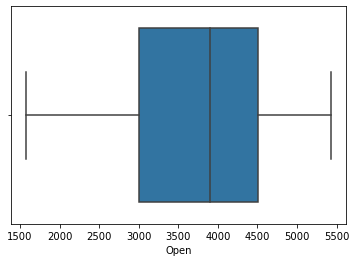

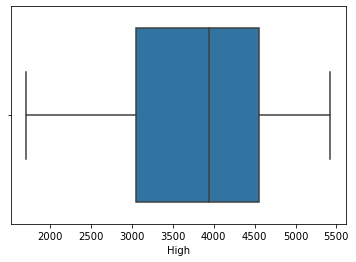

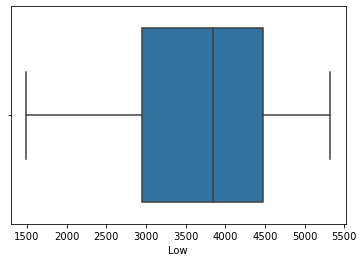

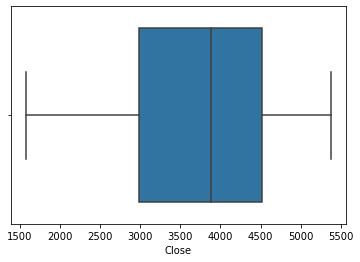

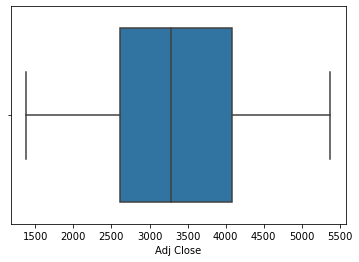

In [ ]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [ ]:
# Function to identify outliers using the IQR method
def find_outliers_iqr(column):
    if df[column].dtype in ['float']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame()

# Identify columns with outliers
columns_with_outliers = []
outliers_counts = {}

for column in df.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)


In [ ]:
# Display columns with outliers and number of outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### **Data Type Transformation**


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   Open       1233 non-null   float64       
 2   High       1233 non-null   float64       
 3   Low        1233 non-null   float64       
 4   Close      1233 non-null   float64       
 5   Adj Close  1233 non-null   float64       
 6   Volume     1233 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.6 KB


## **Data Visualization**

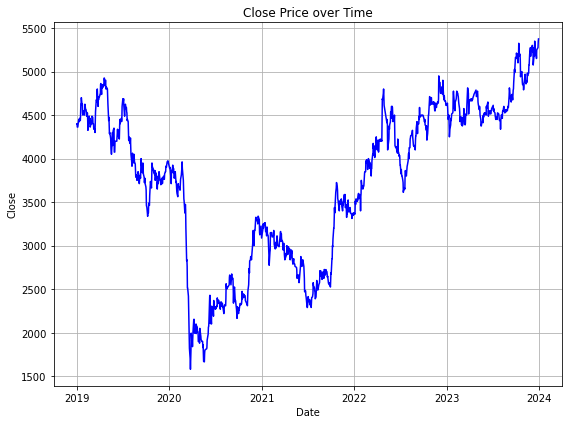

In [ ]:
#Close
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='b')

# Label sumbu x dan y
plt.xlabel('Date')
plt.ylabel('Close')

# Judul grafik
plt.title('Close Price over Time')

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

## **Saving Cleaned Data to csv**

In [ ]:
df.to_csv('BBNI_Cleaned.csv', index=False)